In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
caffe_root ="/home/lqp/caffe/"
import sys
sys.path.insert(0,caffe_root+"python")
import caffe

In [3]:
caffe.set_mode_cpu()

In [4]:
#load the original network and extract the fully connected layers' parameters
net = caffe.Net("/home/lqp/caffe/models/bvlc_reference_caffenet/deploy.prototxt",
               "/home/lqp/caffe/models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel",
               caffe.TEST)

In [5]:
params = ["fc6","fc7","fc8"]
fc_params = {pr:(net.params[pr][0].data,net.params[pr][1].data) for pr in params}

In [6]:
for fc in params:
    print("{} weights are {} dimensional and biases are {} dimensional".format(fc, fc_params[fc][0].shape, fc_params[fc][1].shape))

fc6 weights are (4096, 9216) dimensional and biases are (4096,) dimensional
fc7 weights are (4096, 4096) dimensional and biases are (4096,) dimensional
fc8 weights are (1000, 4096) dimensional and biases are (1000,) dimensional


In [7]:
# Load the fully convolutional network to transplant the parameters
net_full_conv = caffe.Net("/home/lqp/caffe/examples/net_surgery/bvlc_caffenet_full_conv.prototxt",
                         "/home/lqp/caffe/models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel",
                         caffe.TEST)

In [8]:
net_full_conv.params["conv5"][0].data

array([[[[ -1.34501746e-02,  -1.74268465e-02,  -1.54307885e-02],
         [ -2.83990409e-02,  -2.73106825e-02,  -1.72144715e-02],
         [ -3.98955941e-02,  -3.99591811e-02,  -1.34450346e-02]],

        [[ -1.30406329e-02,  -1.22664208e-02,  -1.33846160e-02],
         [ -3.29689053e-03,  -3.10444762e-03,  -4.42740461e-03],
         [ -1.53063657e-02,  -1.40058016e-02,  -1.73963290e-02]],

        [[ -1.37717584e-02,  -6.55113859e-03,   8.55155103e-03],
         [ -1.09376172e-02,  -3.67926550e-03,  -1.26601999e-05],
         [ -2.88339742e-02,  -3.49166431e-02,  -5.49216708e-03]],

        ..., 
        [[ -1.05917174e-02,  -9.80548002e-03,  -1.32092359e-02],
         [ -1.10048689e-02,  -3.64003383e-04,  -4.25056880e-03],
         [  3.28095222e-04,   5.48789604e-03,  -1.75325479e-03]],

        [[ -1.11777456e-02,  -2.09406018e-02,  -2.18635108e-02],
         [ -5.18693915e-03,  -4.18500463e-03,  -9.05862544e-03],
         [ -1.05987284e-02,  -4.98783030e-03,  -1.23872224e-03]],

 

In [9]:
net_full_conv.params["fc6-conv"][0].data

array([[[[ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.]],

        ..., 
        [[ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0

In [10]:
net_full_conv.params["fc6-conv"][0].data.shape

(4096, 256, 6, 6)

In [11]:
params_full_conv = ["fc6-conv","fc7-conv","fc8-conv"]
conv_params = {pr:(net_full_conv.params[pr][0].data, net_full_conv.params[pr][1].data) for pr in params_full_conv}
for conv in params_full_conv:
    print("{} weights are {} dimensional and biases are {} dimensional".format(conv,
                                                                               conv_params[conv][0].shape,
                                                                              conv_params[conv][1].shape))

fc6-conv weights are (4096, 256, 6, 6) dimensional and biases are (4096,) dimensional
fc7-conv weights are (4096, 4096, 1, 1) dimensional and biases are (4096,) dimensional
fc8-conv weights are (1000, 4096, 1, 1) dimensional and biases are (1000,) dimensional


In [12]:
for pr,pr_conv in zip(params,params_full_conv):
    conv_params[pr_conv][0].flat = fc_params[pr][0].flat
    conv_params[pr_conv][1][...] = fc_params[pr][1]

In [13]:
net_full_conv.params["fc6-conv"][0].data

array([[[[  6.39847480e-03,   9.15686041e-03,   4.67042858e-03,
            1.18940964e-03,   8.33049766e-04,   2.49257917e-03],
         [  2.49608839e-03,  -3.54957511e-03,  -5.02380775e-03,
           -6.60043536e-03,  -8.10634810e-03,  -1.20968849e-03],
         [ -1.82750972e-03,  -1.81385351e-03,  -3.27347941e-03,
           -6.57626567e-03,  -1.05982488e-02,  -2.23065889e-03],
         [  2.36637105e-04,   4.09839151e-04,  -5.26190386e-04,
           -1.24061992e-03,  -2.69398093e-03,  -5.10810059e-04],
         [  1.49969733e-03,   1.23308564e-03,  -1.38061121e-04,
           -1.11618754e-03,   3.21043399e-03,   2.84487079e-03],
         [  5.13871957e-04,  -8.71420372e-04,  -3.89365538e-04,
           -8.67804803e-04,   4.90240334e-03,   1.55214593e-03]],

        [[ -3.54988081e-03,  -3.16645065e-03,  -2.19912361e-03,
           -1.87401497e-03,  -1.93061132e-03,   1.07879157e-03],
         [  3.98943695e-04,  -1.03022918e-04,  -3.76783754e-03,
           -6.26354339e-03,  -3

In [14]:
net_full_conv.save("/home/lqp/caffe/examples/net_surgery/bvlc_caffenet_full_conv.caffemodel")

In [30]:
im = caffe.io.load_image("/home/lqp/caffe/examples/images/cat.jpg")
transformer = caffe.io.Transformer({'data': net_full_conv.blobs['data'].data.shape})  
transformer.set_mean('data', np.load('/home/lqp/caffe/python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1))  
transformer.set_transpose('data', (2,0,1))  
transformer.set_channel_swap('data', (2,1,0))  
transformer.set_raw_scale('data', 255.0)

In [31]:
data = np.asarray([transformer.preprocess("data",im)])

In [32]:
data.shape   #not (1,3,227,227)

(1, 3, 451, 451)

In [33]:
out = net_full_conv.forward_all(data = np.asarray([transformer.preprocess("data",im)]))

In [34]:
out["prob"][0].argmax(axis=0)

array([[282, 282, 281, 281, 281, 281, 277, 282],
       [281, 283, 283, 281, 281, 281, 281, 282],
       [283, 283, 283, 283, 283, 283, 287, 282],
       [283, 283, 283, 281, 283, 283, 283, 259],
       [283, 283, 283, 283, 283, 283, 283, 259],
       [283, 283, 283, 283, 283, 283, 259, 259],
       [283, 283, 283, 283, 259, 259, 259, 277],
       [335, 335, 283, 259, 263, 263, 263, 277]])

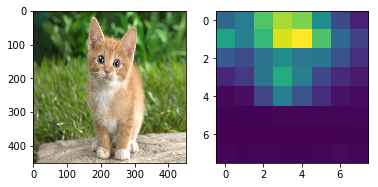

In [18]:
plt.subplot(1, 2, 1)  
plt.imshow(transformer.deprocess('data', net_full_conv.blobs['data'].data[0]))  
plt.subplot(1, 2, 2)  
plt.imshow(out['prob'][0,281])  
pylab.show()  

In [19]:
out['prob'].shape

(1, 1000, 8, 8)

In [23]:
out = net_full_conv.forward()

In [25]:
out["prob"].shape

(1, 1000, 8, 8)

In [36]:
out['prob'][0,281]

(8, 8)